In [1]:
import pandas as pd
train = pd.read_csv('laba04_train.csv')

In [2]:
def decode_dataset(dataset):
    
    APP_DRIVING_LICENSEs = {'Y': 1, 'N': 0}
    dataset["APP_DRIVING_LICENSE"] = dataset["APP_DRIVING_LICENSE"].apply(lambda x: APP_DRIVING_LICENSEs.get(x))
    
    CLNT_JOB_POSITION_TYPEs = {'SPECIALIST': 1, 'MANAGER': 4, 'TOP_MANAGER': 2, 'SELF_EMPL':3 }
    dataset["CLNT_JOB_POSITION_TYPE"] = dataset["CLNT_JOB_POSITION_TYPE"].apply(lambda x: CLNT_JOB_POSITION_TYPEs.get(x))
    
    APP_CARs = {'Y': 1, 'N': 0}
    dataset["APP_CAR"] = dataset["APP_CAR"].apply(lambda x: APP_CARs.get(x))
    
    APP_TRAVEL_PASSs = {'Y': 1, 'N': 0}
    dataset["APP_TRAVEL_PASS"] = dataset["APP_TRAVEL_PASS"].apply(lambda x: APP_TRAVEL_PASSs.get(x))
    
    APP_POSITION_TYPEs = {'SPECIALIST': 1, 'MANAGER': 4, 'TOP_MANAGER': 2, 'SELF_EMPL':3 }
    dataset["APP_POSITION_TYPE"] = dataset["APP_POSITION_TYPE"].apply(lambda x: APP_POSITION_TYPEs.get(x))
    
    APP_KIND_OF_PROP_HABITATIONs = {'SO': 1, 'JO': 5, 'OTHER': 2, 'RENT':3, 'NPRIVAT':4}
    dataset["APP_KIND_OF_PROP_HABITATION"] = dataset["APP_KIND_OF_PROP_HABITATION"].apply(lambda x: APP_KIND_OF_PROP_HABITATIONs.get(x))
    
    APP_EMP_TYPEs = {'PRIVATE': 1, 'STATE': 4, 'INTER': 2, 'IP':3 }
    dataset["APP_EMP_TYPE"] = dataset["APP_EMP_TYPE"].apply(lambda x: APP_EMP_TYPEs.get(x))
    
    return dataset

In [3]:
def drop_dataset(dataset, with_set_01=True):
    
    if with_set_01:
        dataset = dataset.drop(['ID', 'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS', 
                                'PRC_ACCEPTS_A_TK', 'TURNOVER_DYNAMIC_IL_1M', 'PRC_ACCEPTS_A_AMOBILE',
                                'PRC_ACCEPTS_TK', 'PRC_ACCEPTS_A_MTP',
                                'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_MTP', 'CNT_ACCEPTS_MTP',
                                'TURNOVER_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M',
                                'LDEAL_YQZ_CHRG', 'CR_PROD_CNT_CCFP', 'MAX_PCLOSE_DATE', 
                                'LDEAL_YQZ_PC', 'CLNT_SALARY_VALUE'], axis=1)
    
    return dataset.drop(['APP_COMP_TYPE', 'APP_EDUCATION', 'APP_MARITAL_STATUS', 'CNT_ACCEPTS_TK',
                         'APP_REGISTR_RGN_CODE', 'CLNT_JOB_POSITION', 'CLNT_TRUST_RELATION', 'PACK'], axis=1)
    

In [4]:
train = decode_dataset(train)
train = drop_dataset(train)
train = train.fillna(0)

In [5]:
test = pd.read_csv('laba04_test.csv')

test_id = test.ID
test = decode_dataset(test)
test = drop_dataset(test)
test = test.fillna(0)

In [ ]:
matplotlib inline

In [ ]:
import seaborn as sea
sea.pairplot(train, hue="TARGET", vars=["AGE", "REST_AVG_CUR", "REST_AVG_PAYM"])

In [6]:
y = train.TARGET
train = train.drop(["TARGET"], axis=1)

In [68]:
# from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     train, 
#     y, 
#     test_size=0.33,
#     random_state=42)

In [36]:
# ROC AUC 0.72007114093988478
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(X_train, y_train)    
    
# pred = lr.predict_proba(X_test)

In [7]:
# ROC AUC 0.7483843260840326
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train, y)    
    
pred = rfc.predict_proba(test)

In [18]:
with open('lab04.csv', 'w') as file:
    file.write('id' + '\t' + 'target' + '\n')
    id_num = 0
    for item in pred[:,1]:   
        file.write(str(test_id[id_num]).strip() + '\t' + str(item) + '\n')
        id_num = id_num + 1

In [70]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])

In [71]:
metrics.auc(fpr, tpr)

0.7495246124081526

In [54]:
pred[:,1]

array([ 0. ,  0.1,  0. , ...,  0.2,  0.1,  0. ])

In [56]:
matplotlib inline

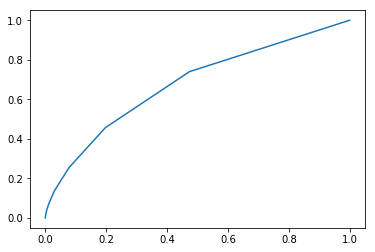

In [57]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [58]:
metrics.roc_auc_score(y_test, pred[:,1])

0.677498950606786